## Update Tim's code with False Positive Analysis

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

item_df = pd.read_excel('Tableau - Item Dim.xlsx')


tf_vec = TfidfVectorizer(ngram_range = (1,2))
tf_df = tf_vec.fit_transform(item_df['Product Name'] )
# print(tf_df.shape)

rf_class = RandomForestClassifier(min_samples_split=.05, random_state = 99, n_estimators = 2000)
rf_class.fit(tf_df, item_df['train_Sub-Category'])

item_df['Model_Predict'] = rf_class.predict(tf_df)

scat_errors = item_df[item_df.train_status == 'error: Sub-category']
errors_fixed = (scat_errors['Sub-Category'] == scat_errors['Model_Predict']).sum()

#correct_records = item_df[item_df.train_status == 'Correct Record']
predicted_diff_value = (item_df['Sub-Category'] != item_df['Model_Predict']).sum()


print "Error captured: %.2f" % (float(errors_fixed) / scat_errors.shape[0])
print "Difference in record: %.2f" % (float(predicted_diff_value)/item_df.shape[0])
print "Number of different record: %d" % predicted_diff_value

Error captured: 0.83
Difference in record: 0.02
Number of different record: 32


## Testing output data in CSV

In [8]:
import pandas as pd
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

item_df = pd.read_excel('Tableau - Item Dim.xlsx')


tf_vec = TfidfVectorizer(ngram_range = (1,2))
tf_df = tf_vec.fit_transform(item_df['Product Name'] )
# print(tf_df.shape)

rf_class = RandomForestClassifier(min_samples_split=.33)
rf_class.fit(tf_df, item_df['train_Sub-Category'])

item_df['Model_Recommendation'] = rf_class.predict(tf_df)

item_df[''.to_csv('test.csv', sep='\t',  encoding='utf-8')

In [29]:
%matplotlib inline
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


## Graph Tree Structure

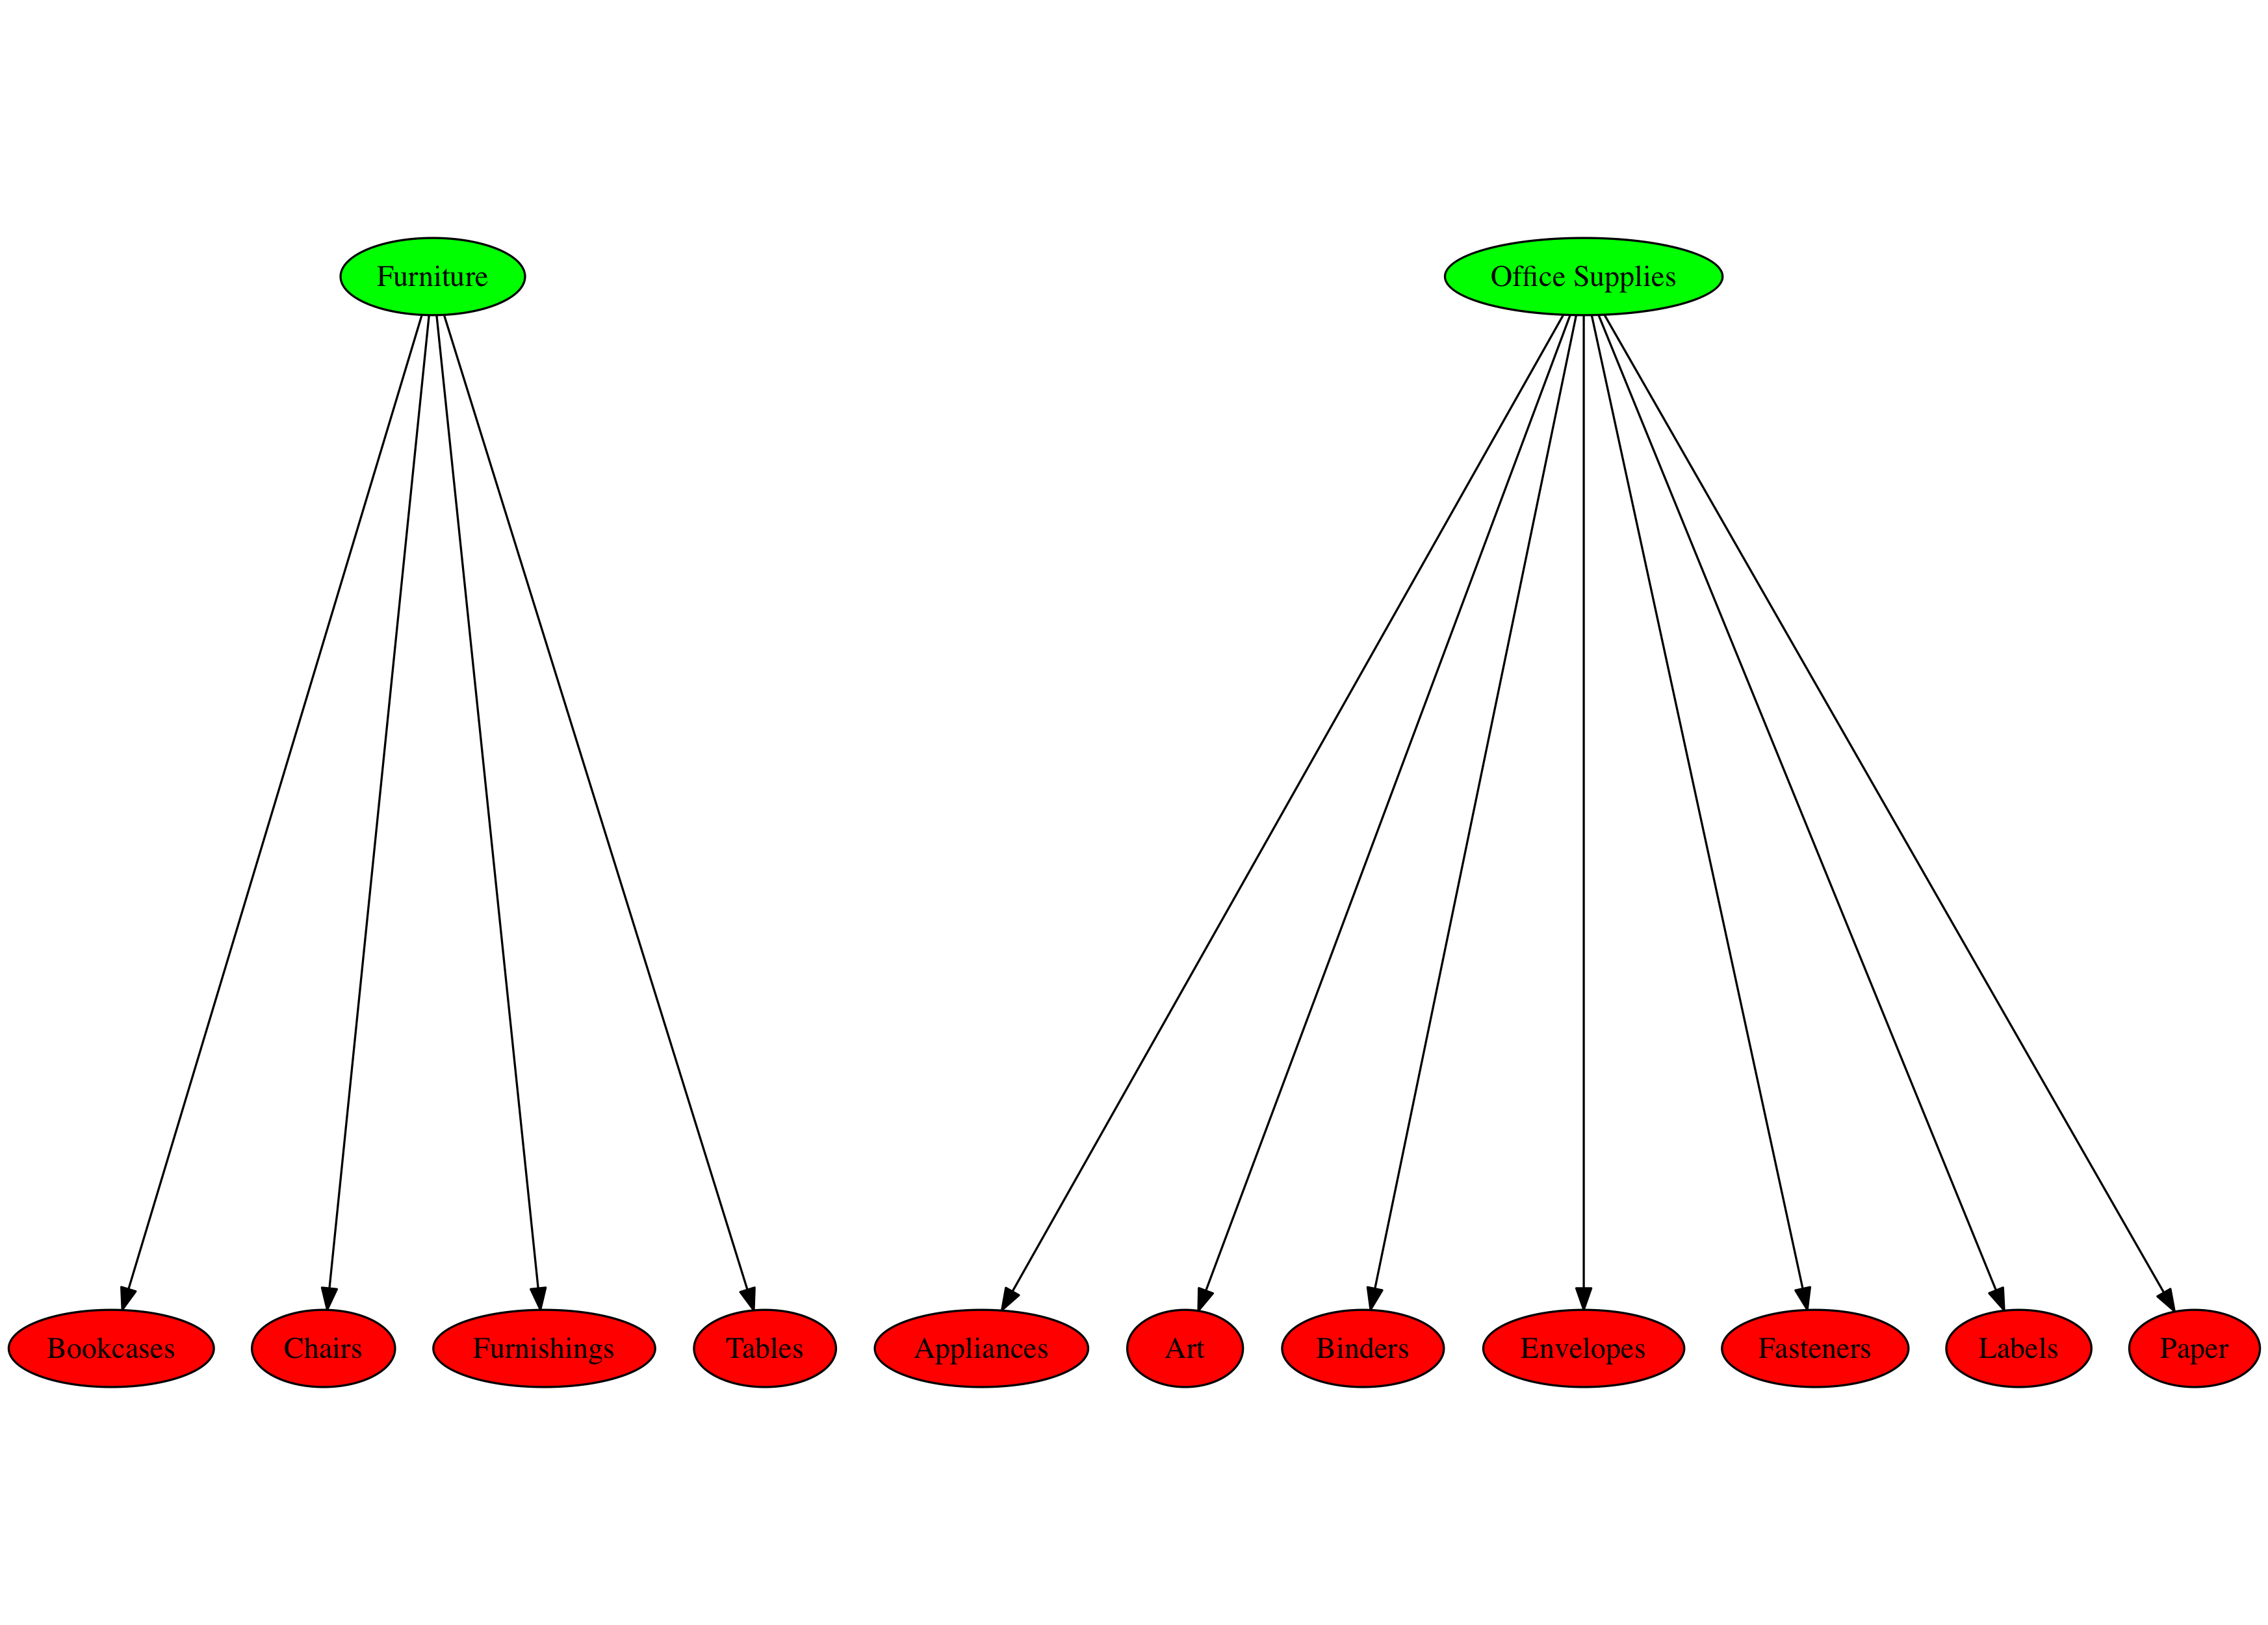

In [62]:
#size="12, 8"
graph = pydot.Dot(graph_type='digraph', size="7, 5", resolution=500,  ratio = "fill", margin = 0)

branch_track = []

for i in range(1000):
  
  node_a = pydot.Node(item_df.iloc[i,0], style="filled", fillcolor="green")
  graph.add_node(node_a)
  
  node_b = pydot.Node(item_df.iloc[i,1], style="filled", fillcolor="red")
  graph.add_node(node_b)
  
  branch_test = item_df.iloc[i,0] + item_df.iloc[i,1]
  
  if branch_test not in branch_track:
    
    graph.add_edge(pydot.Edge(node_a, node_b))
    branch_track.append(branch_test)

graph.write_png('example2_graph.png')

Image(filename='example2_graph.png')

## Additional Graph Demo

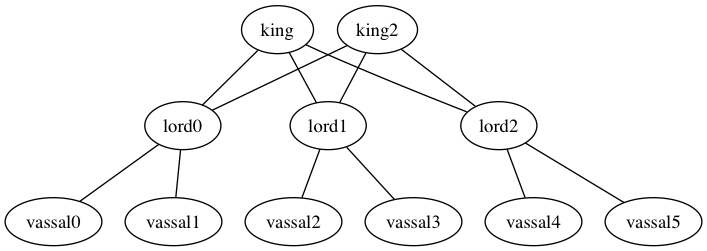

In [2]:
from IPython.display import Image
import pydot # import pydot or you're not going to get anywhere my friend :D

# first you create a new graph, you do that with pydot.Dot()
graph = pydot.Dot(graph_type='graph')

# the idea here is not to cover how to represent the hierarchical data
# but rather how to graph it, so I'm not going to work on some fancy
# recursive function to traverse a multidimensional array...
# I'm going to hardcode stuff... sorry if that offends you

# let's add the relationship between the king and vassals
for i in range(3):
    # we can get right into action by "drawing" edges between the nodes in our graph
    # we do not need to CREATE nodes, but if you want to give them some custom style
    # then I would recomend you to do so... let's cover that later
    # the pydot.Edge() constructor receives two parameters, a source node and a destination
    # node, they are just strings like you can see
    edge = pydot.Edge("king", "lord%d" % i)
    # and we obviosuly need to add the edge to our graph
    graph.add_edge(edge)
    
    edge = pydot.Edge("king2", "lord%d" % i)
    graph.add_edge(edge)

# now let us add some vassals
vassal_num = 0
for i in range(3):
    # we create new edges, now between our previous lords and the new vassals
    # let us create two vassals for each lord
    for j in range(2):
        edge = pydot.Edge("lord%d" % i, "vassal%d" % vassal_num)
        graph.add_edge(edge)
        vassal_num += 1

graph.write_png('example1_graph.png')
Image(filename='example1_graph.png')

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

G.add_node("ROOT")

for i in xrange(5):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
nx.write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.title("draw_networkx")
pos=nx.graphviz_layout(G,prog='dot')
nx.draw(G,pos,with_labels=False,arrows=False)
plt.savefig('nx_test.png')

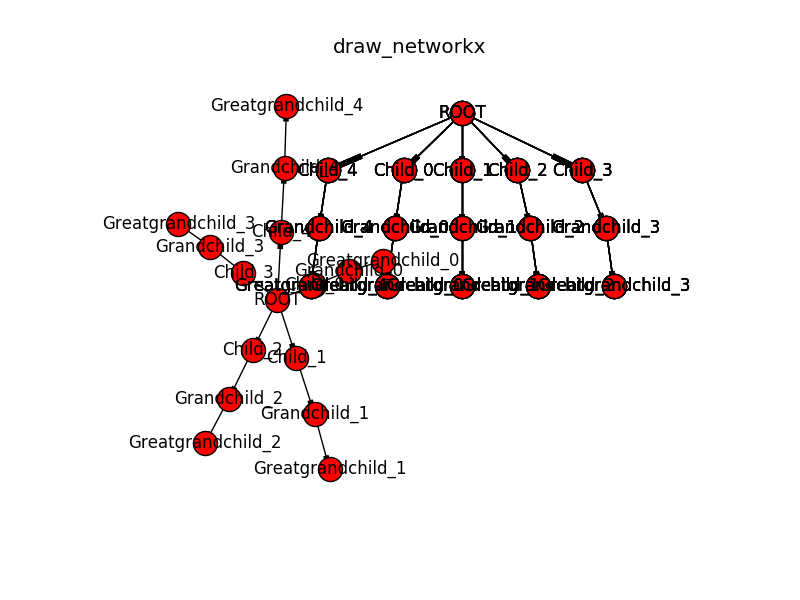

In [15]:
Image(filename='nx_test.png')

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

G.add_node("ROOT")

for i in xrange(5):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

plt.title("draw_networkx")
nx.draw_networkx(G)

plt.show()

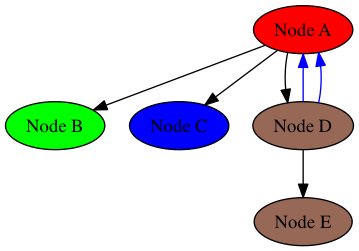

In [55]:
import pydot

# this time, in graph_type we specify we want a DIrected GRAPH
graph = pydot.Dot(graph_type='digraph')

# in the last example, we did no explicitly create nodes, we just created the edges and
# they automatically placed nodes on the graph. Unfortunately, this way we cannot specify
# custom styles for the nodes (although you CAN set a default style for all objects on
# the graph...), so let's create the nodes manually.

# creating nodes is as simple as creating edges!
node_a = pydot.Node("Node A", style="filled", fillcolor="red")
# but... what are all those extra stuff after "Node A"?
# well, these arguments define how the node is going to look on the graph,
# you can find a full reference here:
# http://www.graphviz.org/doc/info/attrs.html
# which in turn is part of the full docs in
# http://www.graphviz.org/Documentation.php

# neat, huh? Let us create the rest of the nodes!
node_b = pydot.Node("Node B", style="filled", fillcolor="green")
node_c = pydot.Node("Node C", style="filled", fillcolor="#0000ff")
node_d = pydot.Node("Node D", style="filled", fillcolor="#976856")
node_e = pydot.Node("Node E", style="filled", fillcolor="#976856")

#ok, now we add the nodes to the graph
graph.add_node(node_a)
graph.add_node(node_b)
graph.add_node(node_c)
graph.add_node(node_d)
graph.add_node(node_e)

# and finally we create the edges
# to keep it short, I'll be adding the edge automatically to the graph instead
# of keeping a reference to it in a variable
graph.add_edge(pydot.Edge(node_a, node_b))
graph.add_edge(pydot.Edge(node_a, node_c))
graph.add_edge(pydot.Edge(node_a, node_d))

graph.add_edge(pydot.Edge(node_d, node_e))
# but, let's make this last edge special, yes?
graph.add_edge(pydot.Edge(node_d, node_a, color="blue"))
graph.add_edge(pydot.Edge(node_d, node_a, color="blue"))


graph.write_png('example2_graph.png')
Image(filename='example2_graph.png')

In [34]:
def add_nodes(graph, nodes):
    for n in nodes:
        if isinstance(n, tuple):
            graph.node(n[0], **n[1])
        else:
            graph.node(n)
    return graph

def add_edges(graph, edges):
    for e in edges:
        if isinstance(e[0], tuple):
            graph.edge(*e[0], **e[1])
        else:
            graph.edge(*e)
    return graph

In [30]:
item_df

,Category,Sub-Category,Product Name,train_Category,train_Sub-Category,train_status,Model_Predict
0,Furniture,Bookcases,"Atlantic Metals Mobile 2-Shelf Bookcases, Cust...",Furniture,Bookcases,Correct Record,Bookcases
1,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",Furniture,Bookcases,Correct Record,Bookcases
2,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",Furniture,Bookcases,Correct Record,Bookcases
3,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",Furniture,Bookcases,Correct Record,Bookcases
4,Furniture,Bookcases,Bestar Classic Bookcase,Furniture,Bookcases,Correct Record,Bookcases
5,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",Furniture,Bookcases,Correct Record,Bookcases
6,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,Correct Record,Bookcases
7,Furniture,Bookcases,"Bush Cubix Collection Bookcases, Fully Assembled",Furniture,Bookcases,Correct Record,Bookcases
8,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,Furniture,Bookcases,Correct Record,Bookcases
9,Furniture,Bookcases,Bush Mission Pointe Library,Furniture,Bookcases,Correct Record,Bookcases


## Other Code Test

In [11]:
from sklearn.linear_model import LogisticRegression

model_LG_L1 = LogisticRegression(penalty ='l1',C= 1)#C from the above test
model_LG_L1.fit(tf_df, item_df['train_Sub-Category'])

item_df['Model_Predict_L2'] = model_LG_L1.predict(tf_df)

scat_errors = item_df[item_df.train_status == 'error: Sub-category']
errors_fixed = (scat_errors['Sub-Category'] == scat_errors['Model_Predict_L2']).sum()

print float(errors_fixed) / scat_errors.shape[0]

0.869565217391


In [28]:
from sklearn.linear_model import LogisticRegression

model_LG_L1 = LogisticRegression(penalty ='l1',C= 10)#C from the above test
model_LG_L1.fit(tf_df, item_df['train_Sub-Category'])

item_df['Model_Predict'] = model_LG_L1.predict(tf_df)

scat_errors = item_df[item_df.train_status == 'error: Sub-category']
errors_fixed = (scat_errors['Sub-Category'] == scat_errors['Model_Predict']).sum()


correct_records = item_df[item_df.train_status == 'Correct Record']
wrong_prediction = (correct_records['Sub-Category'] == correct_records['Model_Predict']).sum()

print "Errors captured: ", float(errors_fixed) / scat_errors.shape[0]

print "Data correctly predicted: ", float(wrong_prediction)/ correct_records.shape[0]

Errors captured:  0.0652173913043
Data correctly predicted:  1.0
